In [1]:
# Checking current path
import os
os.getcwd()

'C:\\Users\\Siegfried Vieluf\\Desktop\\Finance BootCamp\\Python_Pandas\\pandas-homework'

In [2]:
# Initialzing all tools that I may need
import pathlib as Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# Setting up the paths to the CSVs
algo_data= ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/algo_returns.csv')
whale_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/whale_returns.csv')
sp500_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/sp500_history.csv')

In [4]:
# Creating dataframes 
algo_df = pd.read_csv(algo_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
whale_df = pd.read_csv(whale_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
sp500_df = pd.read_csv(sp500_data,index_col='Date',infer_datetime_format=True,parse_dates=True)

#Sorting the dates in all dataframes
sp500_df.sort_index(ascending=True,inplace=True)
algo_df.sort_index(ascending=True,inplace=True)
whale_df.sort_index(ascending=True,inplace=True)


In [5]:
# sampling dataframes
algo_df.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [6]:
whale_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-04-10,-0.000090,0.001230,0.002386,0.001661
2015-11-10,0.000026,0.005828,0.002581,-0.006143
2016-04-20,0.002564,0.000961,-0.002780,0.006317
2015-12-30,-0.009674,-0.003496,-0.010775,-0.014945
2016-06-07,0.003545,0.000857,-0.001582,-0.015105


In [7]:
sp500_df.tail()

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [8]:
# veiwing if there is any null values
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [11]:
# dropping null values
algo_df.dropna(inplace=True)
whale_df.dropna(inplace=True)

In [12]:
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [13]:
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [14]:
# Converting $ currency format to float
sp500_df['Close']=sp500_df['Close'].str.replace("$","")
sp500_df['Close']=sp500_df['Close'].astype("float")
sp500_df.dtypes

<ipython-input-14-592832e8d6ff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close']=sp500_df['Close'].str.replace("$","")


Close    float64
dtype: object

In [15]:
sp500_df_returns=sp500_df.pct_change().dropna()

In [16]:
# changed the name of the S&P 500 returns dataframe to compare to the other dataf
sp500_df_returns=sp500_df_returns.rename(columns={'Close':'S&P 500'})
sp500_df_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
#combining all dataframes
combined_df=pd.concat([algo_df,whale_df,sp500_df_returns],axis='columns',join='inner')
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


In [18]:
combined_df.columns

Index(['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

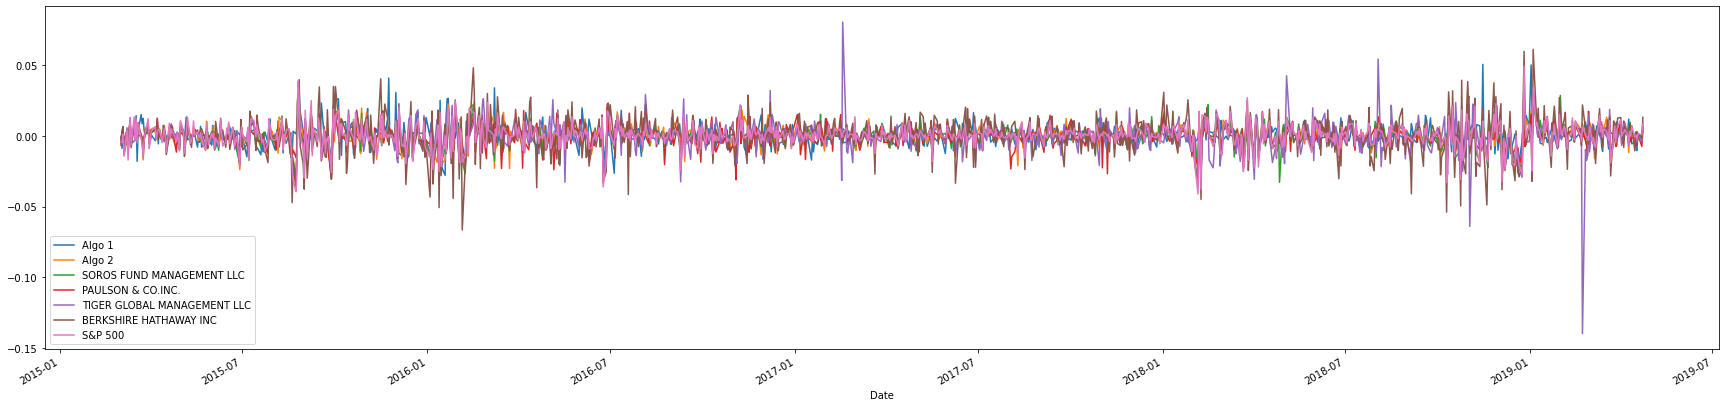

In [19]:
# Question 1 plotting daily returns of all portfolios
# I will combine one plot with all portfolios and plot each individual portfolio to the S&P 500
combined_df.plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

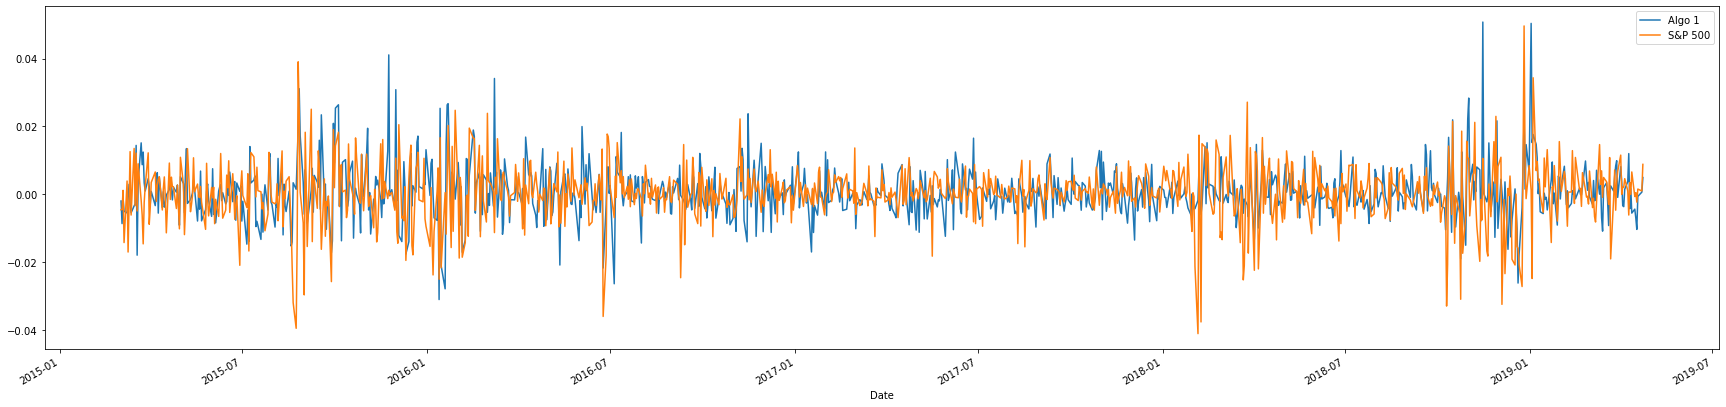

In [20]:
combined_df[['Algo 1','S&P 500']].plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

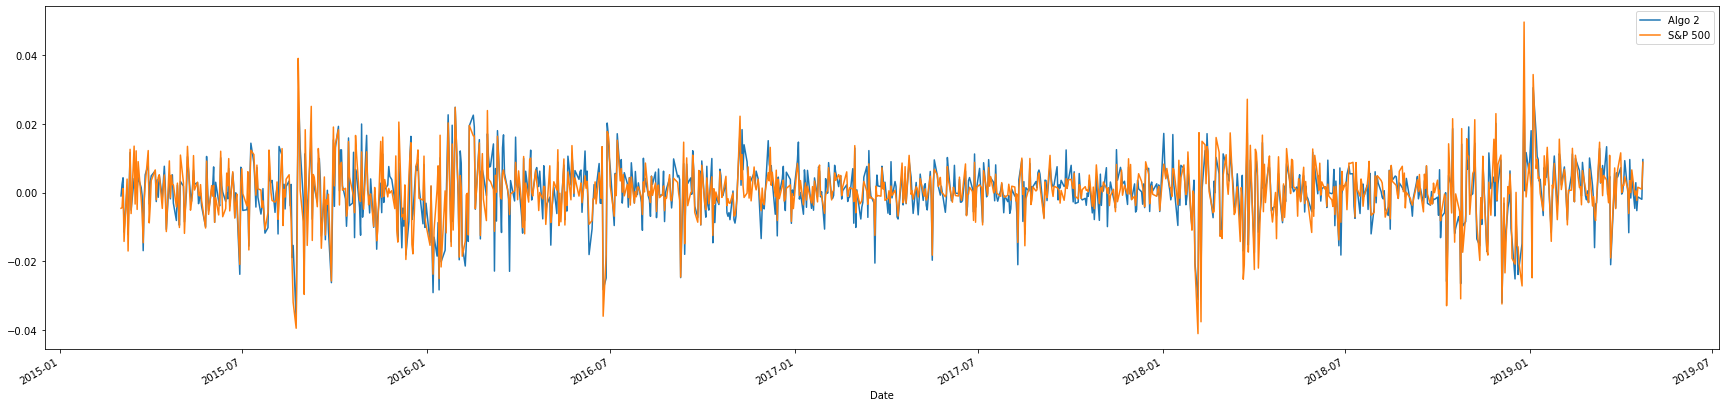

In [21]:
combined_df[['Algo 2','S&P 500']].plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

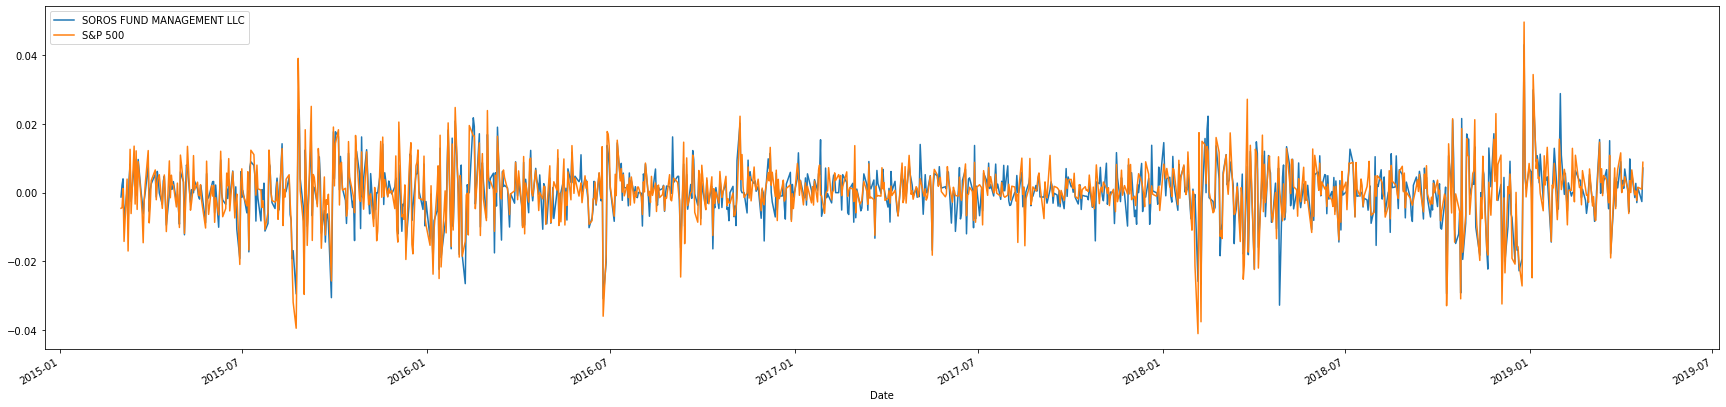

In [22]:
combined_df[['SOROS FUND MANAGEMENT LLC','S&P 500']].plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

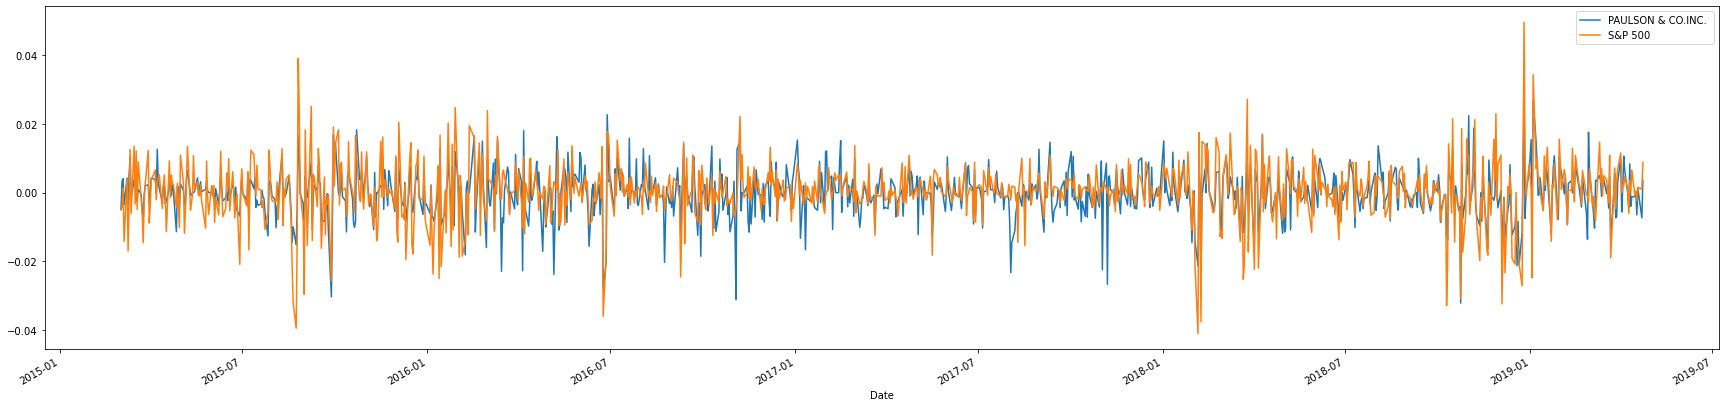

In [23]:
combined_df[['PAULSON & CO.INC. ','S&P 500']].plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

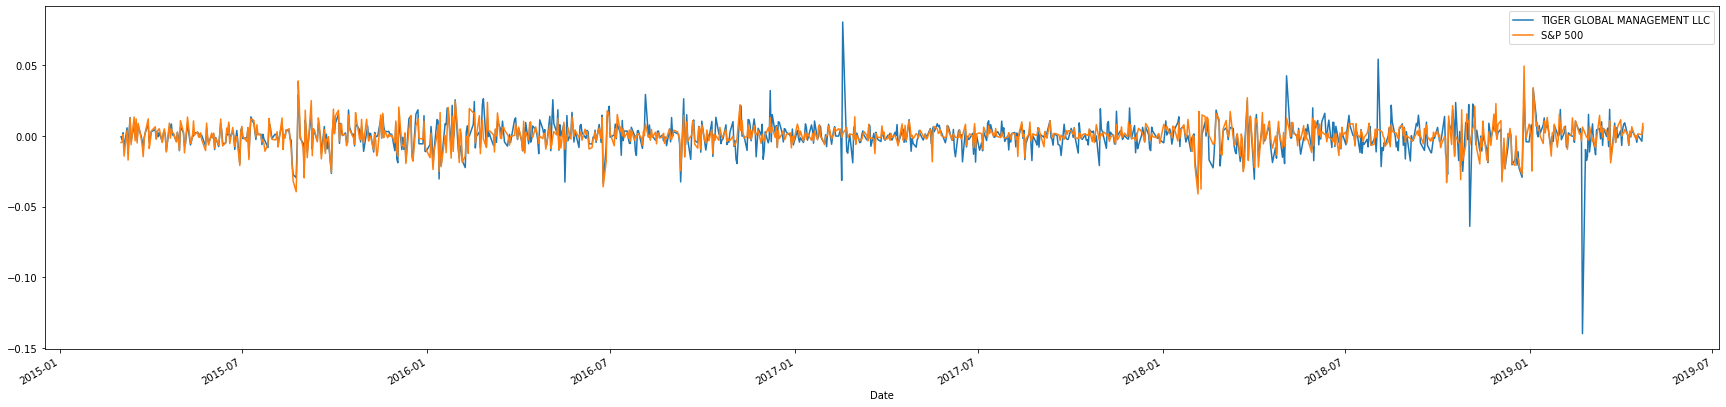

In [24]:
combined_df[['TIGER GLOBAL MANAGEMENT LLC','S&P 500']].plot(figsize=(30,7))

<AxesSubplot:xlabel='Date'>

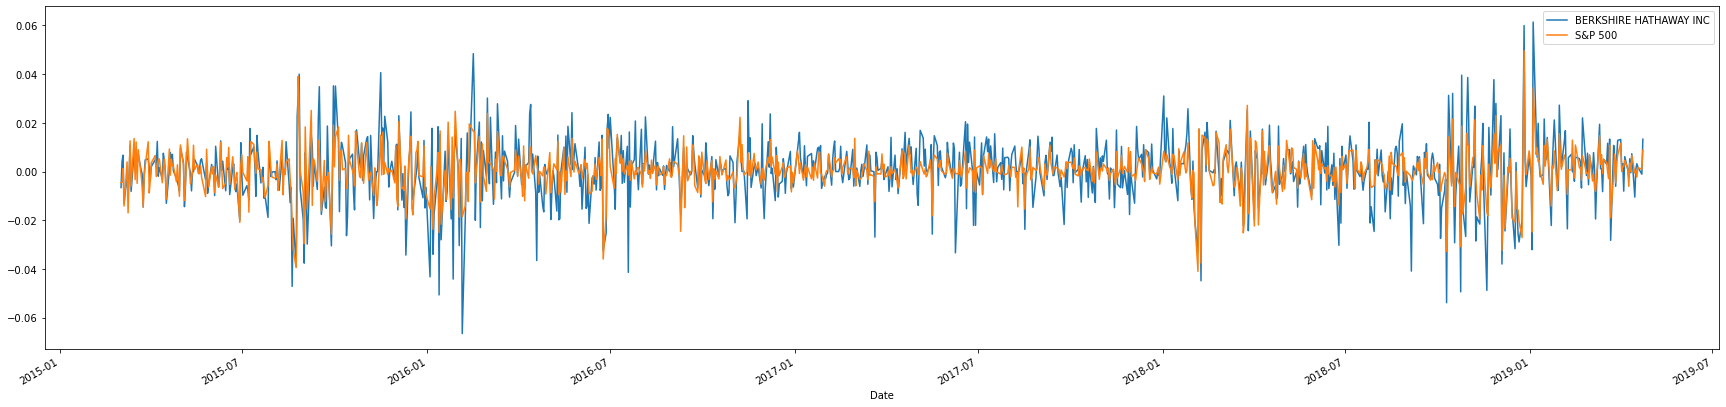

In [25]:
combined_df[['BERKSHIRE HATHAWAY INC','S&P 500']].plot(figsize=(30,7))

In [26]:
# number statistics to compare portfolios to the S&P 500
combined_df.describe(include='all')

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000662,0.000263,0.000177,-0.000214,-0.000083,0.000506,0.000349
std,0.007620,0.008342,0.007895,0.007023,0.010894,0.012919,0.008554
min,-0.030951,-0.036937,-0.032711,-0.032099,-0.139820,-0.066505,-0.040979
25%,-0.003252,-0.003794,-0.003638,-0.004042,-0.004790,-0.005634,-0.002881
50%,0.000069,0.000703,0.000518,0.000000,0.000320,0.000735,0.000419
75%,0.003908,0.005253,0.004328,0.003626,0.005285,0.007619,0.004471
max,0.050735,0.030822,0.042977,0.029338,0.080705,0.061341,0.049594


In [27]:
# calculating cummulative returns for all portfolios
cumm_returns = (1 + combined_df).cumprod()
cumm_returns.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431,0.995461
2015-03-04,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617,0.991093
2015-03-05,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327,0.992278
2015-03-06,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172,0.978214
2015-03-09,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534,0.982072


In [28]:
# numerical data to compare the cummulative returns to the S&P 500
cumm_returns.describe(include='all')

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,1.388985,1.086949,1.049830,0.876039,1.147966,1.159619,1.123552
std,0.232277,0.131700,0.073238,0.088455,0.149844,0.241575,0.144448
min,0.911863,0.788600,0.881701,0.691364,0.822799,0.776232,0.863837
25%,1.333701,0.983461,0.989084,0.792596,1.016652,0.936031,0.990805
50%,1.411527,1.084230,1.040700,0.864336,1.139221,1.057741,1.115912
75%,1.469018,1.201804,1.118691,0.950079,1.285354,1.358942,1.263211
max,1.982997,1.318465,1.204573,1.050682,1.428464,1.638119,1.385517


<AxesSubplot:xlabel='Date'>

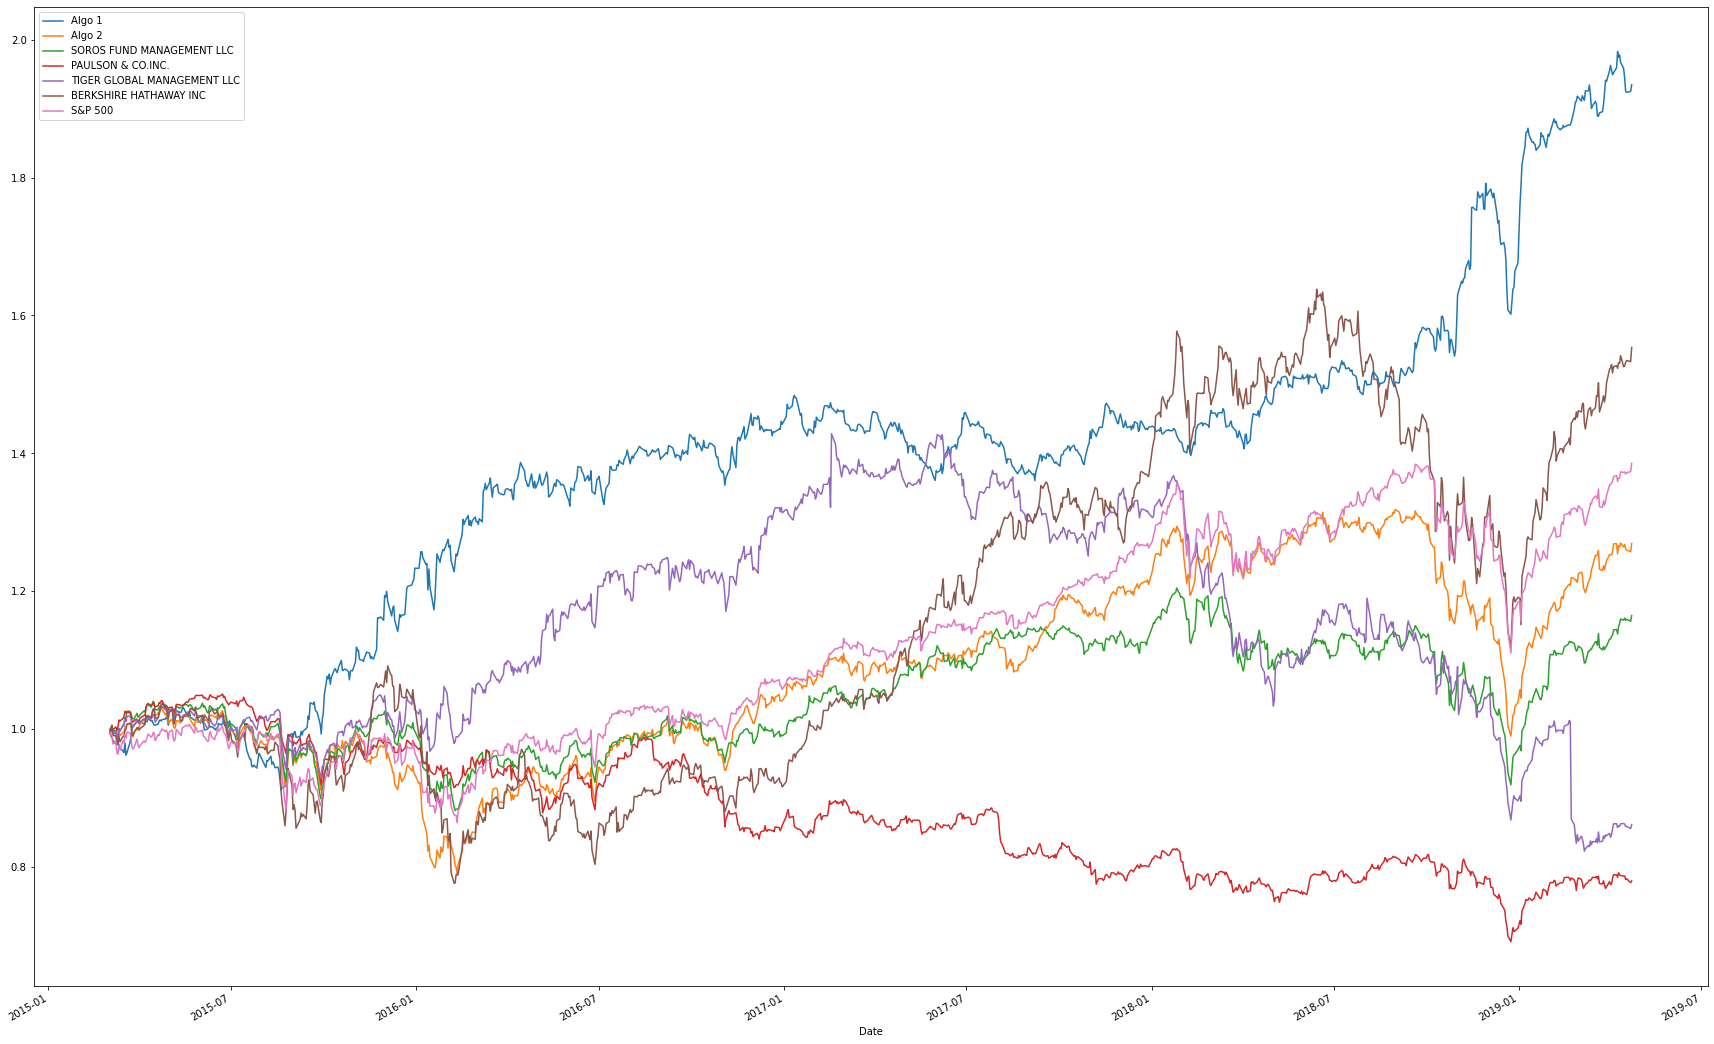

In [44]:
cumm_returns.plot(figsize=(30,20))

In [29]:
# Performance Analysis. 
# Based on individual plots and summary statistics 'Algo 1' beats out the S&P 500.The 'Algo 1'portfolio beats the S&P 500 with a higher minimum return, higher average, higher mean and
# higher max. Looking at the daily return plot graphs you can see also basic resistance and support levels favoring the 'Algo 1' portfolio. 

<AxesSubplot:>

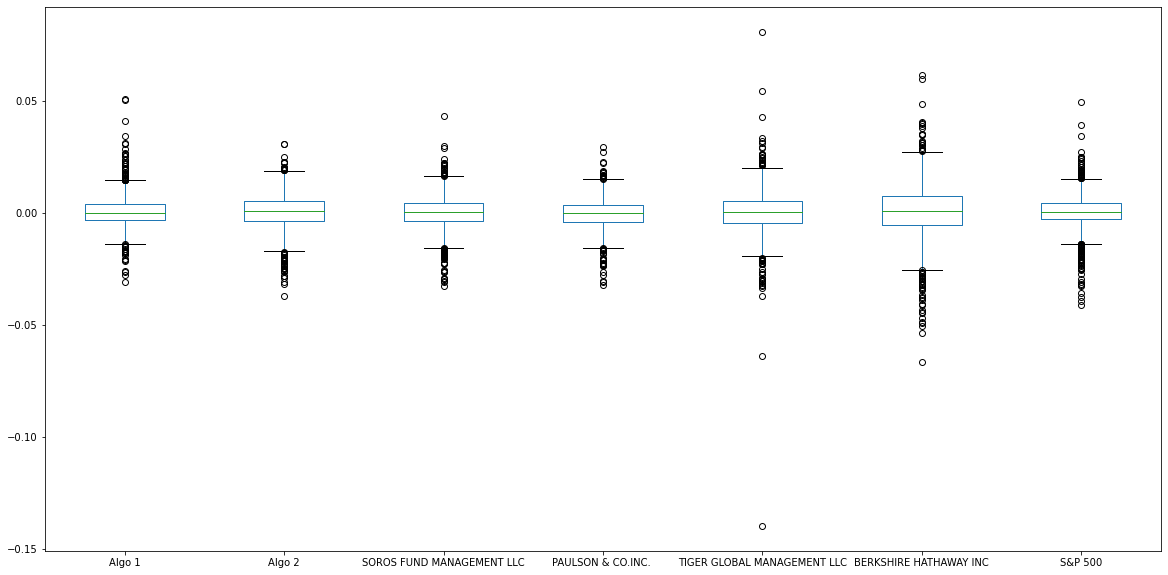

In [30]:
combined_df.plot.box(figsize=(20,10))

In [31]:
returns_std=combined_df.std()
returns_std.sort_values(ascending=False,inplace=True)
returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [32]:
# Based on the plot box and standard deviation figures Tiger Global Management LLC, & Berkshire Hathaway Inc is riskier than the S&P 500.

In [33]:
# Calculating the annualized standard deviation
annual_returns_std = returns_std * np.sqrt(252)
annual_returns_std.sort_values(ascending=False,inplace=True)

In [34]:
annual_returns_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

<AxesSubplot:xlabel='Date'>

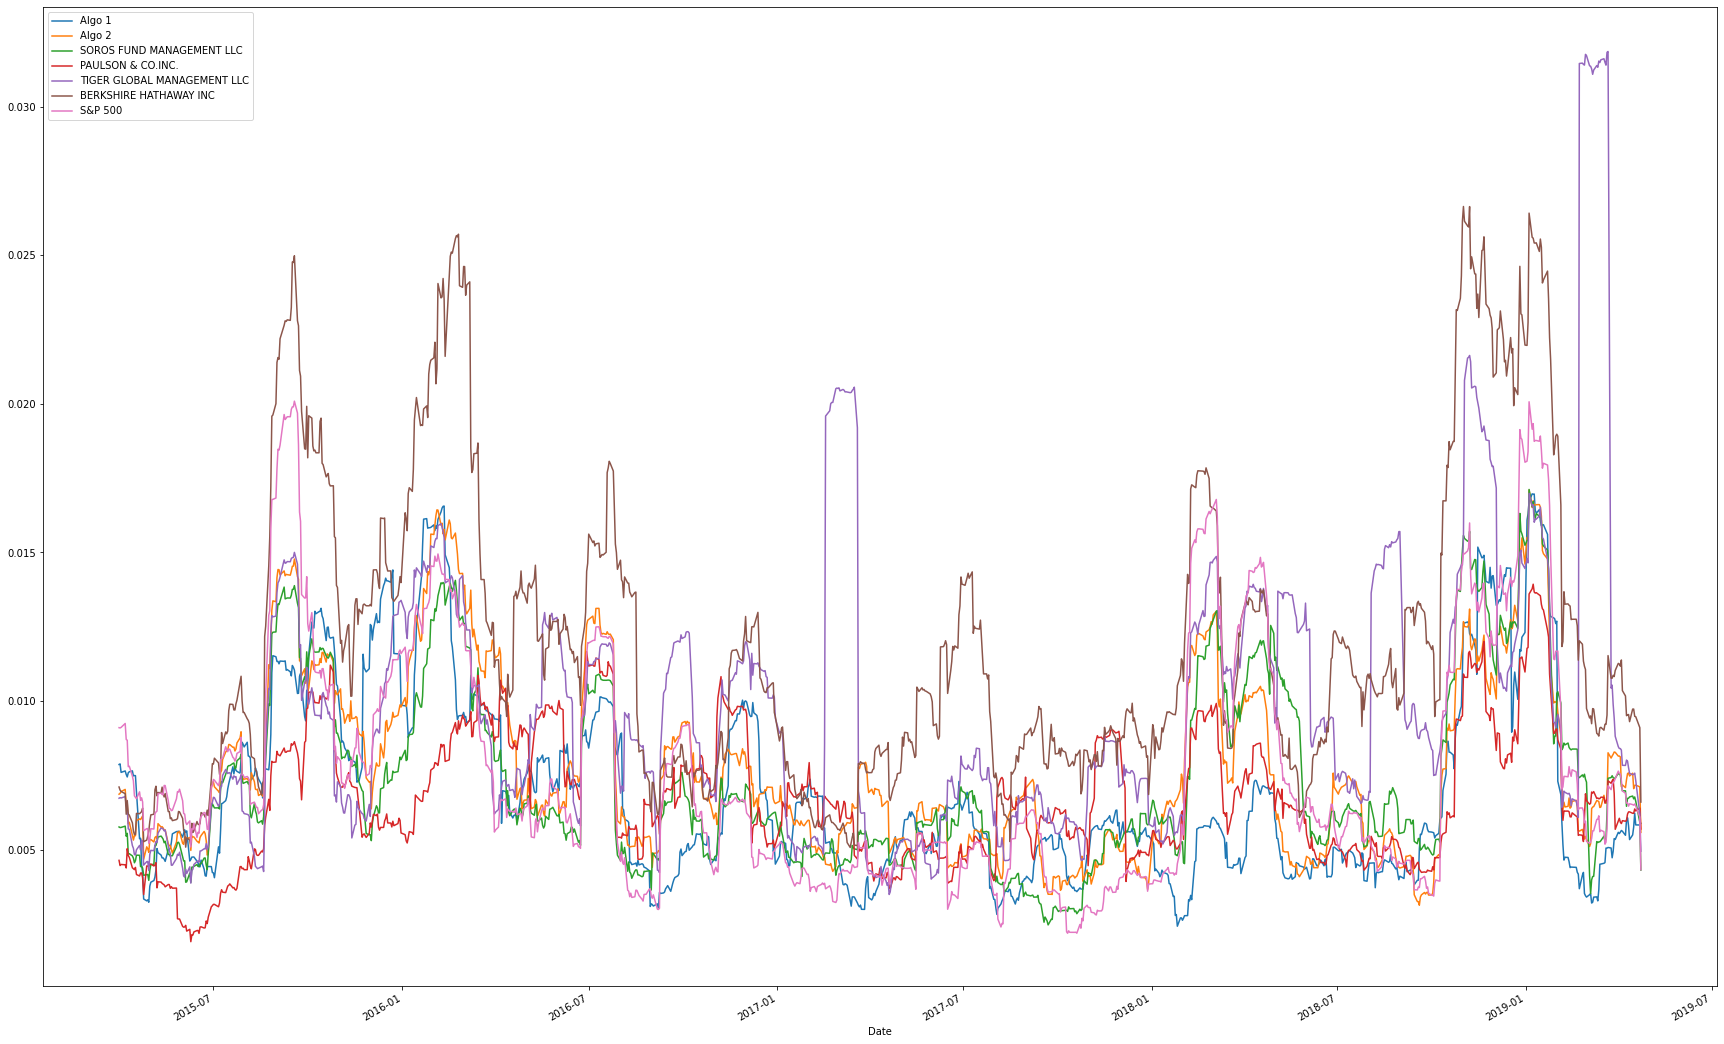

In [35]:
# Calculate and plot the rolling standard devation for all portfolios using a 21 day window
std_21=combined_df.rolling(window=21).std().plot(figsize=(30,20))
std_21

In [36]:
# get the correlation of the portfolios and S&P 500
correlation = combined_df.corr()
correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
S&P 500,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


In [37]:
# 'Algo 2' is the closest to mimick the S&P 500 followed by the Soros Fund portfolio. 

<AxesSubplot:xlabel='Date'>

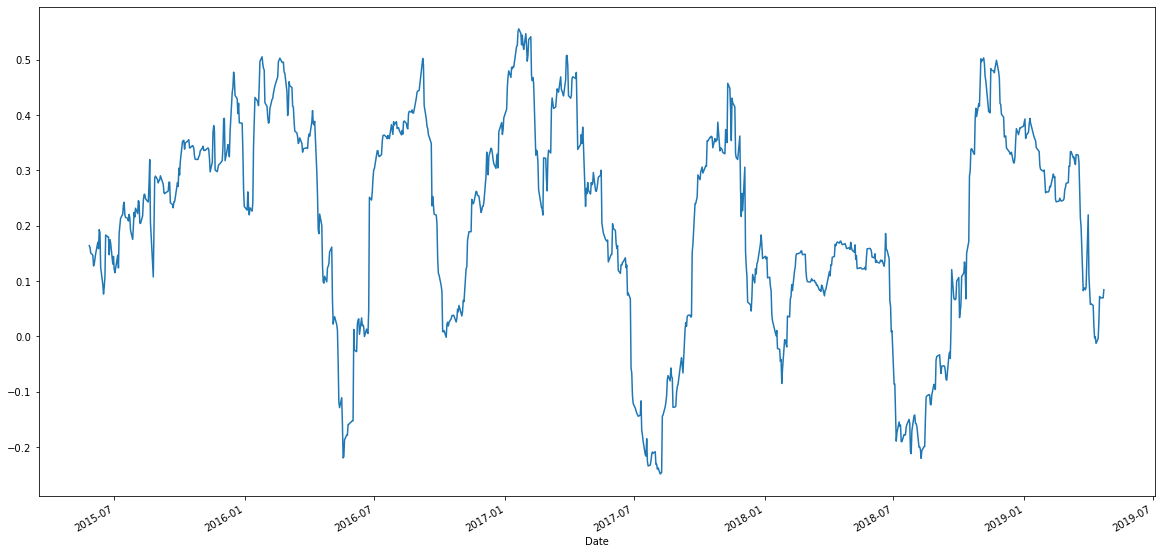

In [38]:
# Choose one portfolio, then calculate and plot the 60 day rolling beta between it and the S&P 500
algo1_rolling_cov=combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_var=combined_df['S&P 500'].rolling(window=60).var()
rolling_beta=algo1_rolling_cov/rolling_var
rolling_beta.plot(figsize=(20,10))

In [39]:
ewm_21 = combined_df.iloc[-21:,:].ewm(halflife=21).mean()
ewm_21

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2019-03-25,0.000973,-0.002058,-0.003330,-0.000420,0.000972,0.010737,-0.000839
2019-03-26,0.003251,0.001841,0.000592,0.002660,0.005149,0.008013,0.003238
2019-03-27,0.005022,-0.000328,-0.000987,-0.000777,0.001902,0.003173,0.000523
2019-03-28,0.006311,0.001274,0.000116,-0.002401,0.002960,0.003906,0.001328
2019-03-29,0.004779,0.001979,0.000389,-0.001242,0.002056,0.005800,0.002482
2019-04-01,0.005390,0.002933,0.001945,0.000803,0.002402,0.007134,0.004124
2019-04-02,0.005136,0.002406,0.001669,-0.000208,0.000982,0.006193,0.003478
2019-04-03,0.003951,0.002110,0.001934,0.000004,0.001571,0.005781,0.003292
2019-04-04,0.002997,0.002256,0.001848,0.001346,0.002441,0.004036,0.003139


<AxesSubplot:xlabel='Date'>

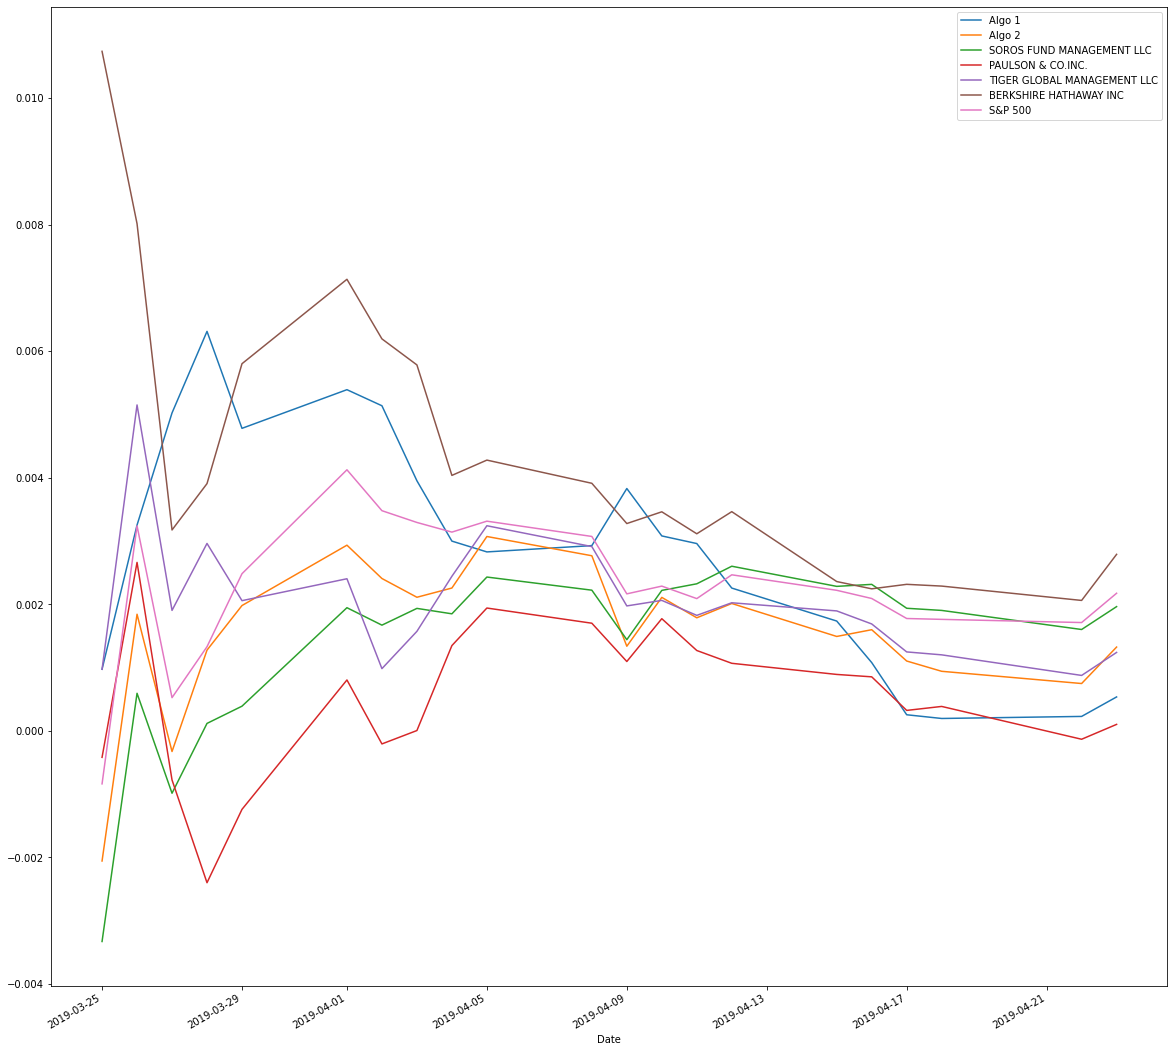

In [40]:
ewm_21.plot(figsize=(20,20))

In [41]:
# Sharpe Ratio of all portfolios
sharpe_ratio=combined_df.mean() *252 /(combined_df.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending=False,inplace=True)
sharpe_ratio

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

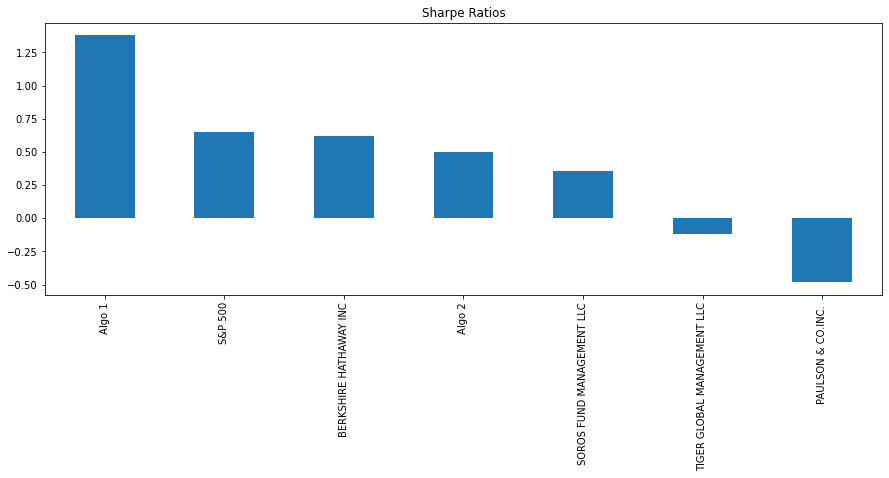

In [42]:
sharpe_ratio.plot.bar(title="Sharpe Ratios",figsize=(15,5))

In [43]:
# 'Algo 1' does out perform the S&P 500 and the whale investors portfolios. Algo 2 beats out the majority of the whal investor portfolio but it does not beat the S&P 500.

In [ ]:
# Creating my portfolio